# House Price Analysis and Prediction

**Digital Empowerment Network – Data Science Week 02**

---

## Project Overview
This project analyzes a dataset of house prices to understand pricing factors, identify outliers, and develop a model for future price prediction.

## Objectives
- Analyze house price data to understand key factors.
- Identify and investigate outliers.
- Build a predictive model for house prices.
- Provide a report with findings and recommendations.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('zameen-updated.csv')
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [3]:
# Check for missing values and data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [4]:
# Basic statistics
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


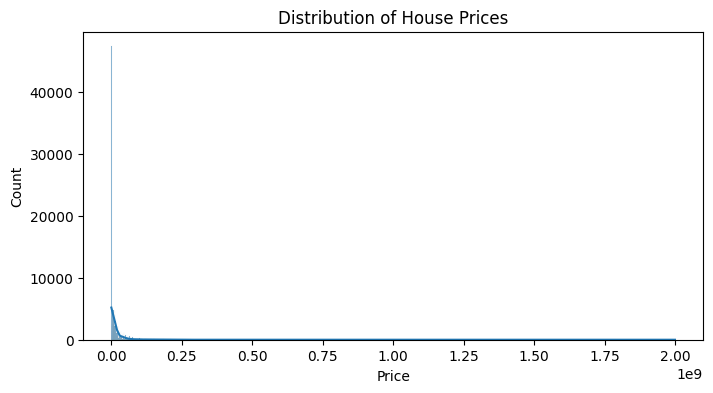

In [5]:
# Visualize distribution of house prices
plt.figure(figsize=(8,4))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

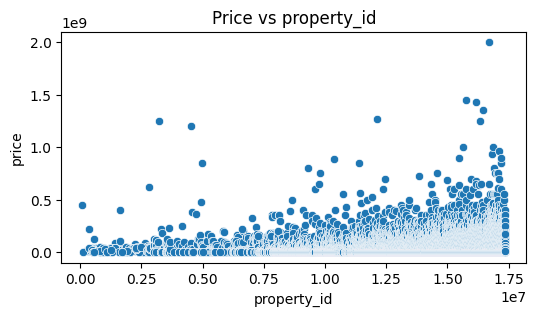

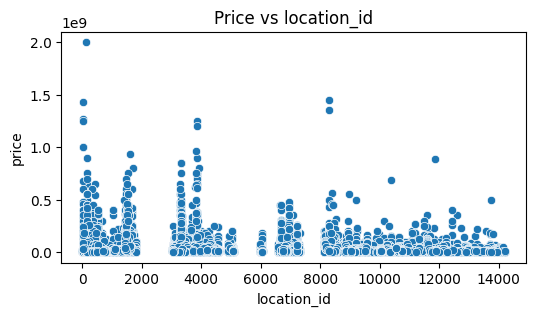

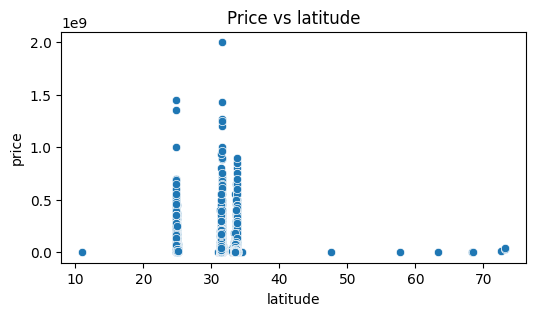

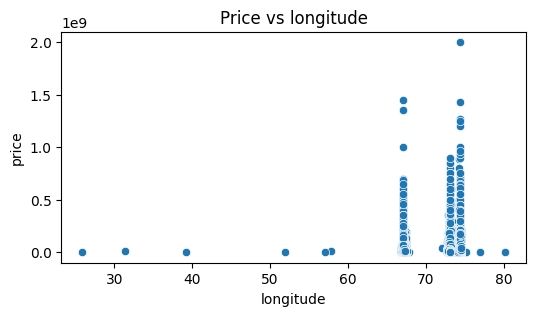

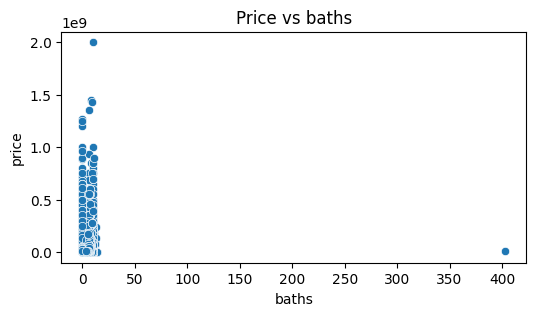

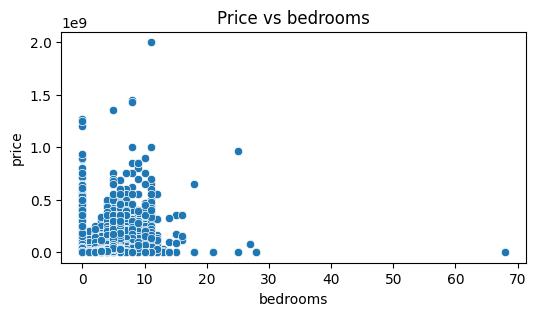

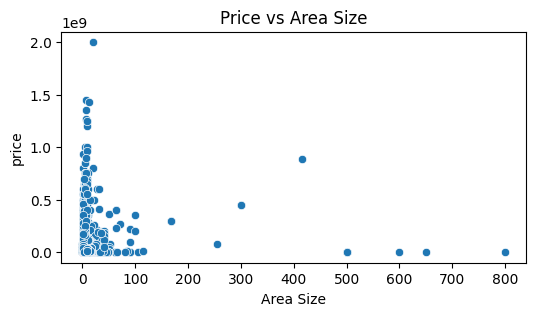

In [6]:
# Visualize relationships between features and price (scatter plots for numeric features)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    if col != 'price':
        plt.figure(figsize=(6,3))
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f'Price vs {col}')
        plt.show()

In [ ]:
# Example: Create 'age' feature if 'year_built' exists
# if 'year_built' in df.columns:
#     df['age'] = 2025 - df['year_built']

# Example: Bedrooms per floor
if 'bedrooms' in df.columns and 'floors' in df.columns:
    df['bedrooms_per_floor'] = df['bedrooms'] / df['floors'].replace(0, np.nan)

# Encode categorical features
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,66424,1,10000000,488,1,0,33.679890,73.012640,2,219,1,2,11,-1,-1,1,4.0,0
1,346905,3236,52551,1,6900000,415,1,0,33.700993,72.971492,3,257,1,3,36,-1,-1,1,5.6,13
2,386513,764,99193,2,16500000,493,1,0,33.631486,72.926559,6,309,1,5,82,-1,-1,1,8.0,13
3,656161,340,87126,2,43500000,211,1,0,33.707573,73.151199,4,153,1,4,28,-1,-1,0,2.0,1
4,841645,3226,52139,2,7000000,351,1,0,33.492591,73.301339,3,309,1,3,75,1892,6262,1,8.0,13


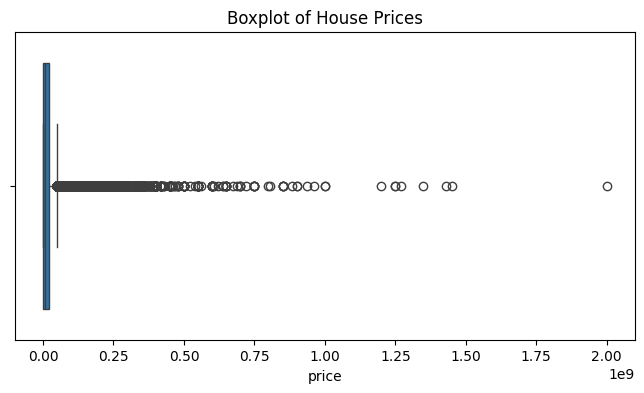

Number of outliers: 13547


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
8,1402466,376,39224,2,50000000,351,1,0,33.540894,73.095732,7,10,1,7,105,1892,6262,0,1.0,1
12,1623818,3300,56252,2,400000000,446,1,0,33.731532,73.065696,0,230,1,0,71,-1,-1,0,4.5,1
17,2230469,9057,45050,2,80000000,351,1,0,33.541728,73.094103,7,153,1,7,81,1892,6262,0,2.0,1
20,2642166,3331,67089,2,55000000,489,1,0,33.671640,72.991655,7,83,1,6,82,-1,-1,1,14.0,3
22,2651838,340,87079,0,88500000,211,1,0,33.713488,73.162680,3,266,1,3,19,-1,-1,0,6.0,12


In [8]:
# Boxplot for price outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title('Boxplot of House Prices')
plt.show()

# Identify outliers using IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers: {outliers.shape[0]}")
outliers.head()

In [9]:
# Investigate features of outlier houses
outliers.describe()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
count,1.354700e+04,13547.000000,13547.000000,13547.000000,1.354700e+04,13547.000000,13547.000000,13547.000000,13547.000000,13547.000000,13547.000000,13547.000000,13547.0,13547.000000,13547.000000,13547.000000,13547.000000,13547.000000,13547.000000,13547.000000
mean,1.544177e+07,3063.532221,70781.138259,1.937477,1.015220e+08,498.017052,2.168967,1.256736,28.994526,70.858449,4.508304,69.296597,1.0,4.973500,58.793829,2491.237322,4167.415885,0.227357,4.509936,2.167343
std,2.365699e+06,3085.473996,41407.252236,0.359434,7.989749e+07,278.989301,0.791129,0.750071,3.776310,3.401201,2.868183,78.183930,0.0,2.266555,21.914864,1853.790166,3391.774753,0.419140,8.219597,2.762321
min,8.657500e+04,4.000000,0.000000,0.000000,4.850000e+07,2.000000,0.000000,0.000000,24.749425,66.912678,0.000000,1.000000,1.0,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.100000,0.000000
25%,1.471705e+07,1448.000000,37310.500000,2.000000,5.800000e+07,351.000000,2.000000,1.000000,24.831143,67.065818,3.000000,10.000000,1.0,5.000000,45.000000,631.000000,895.000000,0.000000,1.000000,1.000000
50%,1.640870e+07,1485.000000,52753.000000,2.000000,7.500000e+07,351.000000,2.000000,1.000000,31.458686,73.005431,5.000000,18.000000,1.0,5.000000,64.000000,2425.000000,3546.000000,0.000000,1.300000,1.000000
75%,1.703275e+07,3748.000000,101497.500000,2.000000,1.150000e+08,562.000000,3.000000,2.000000,31.505678,74.329348,6.000000,143.500000,1.0,6.000000,71.000000,4143.000000,7116.500000,0.000000,4.800000,1.000000
max,1.735771e+07,14024.000000,168400.000000,6.000000,2.000000e+09,1499.000000,4.000000,2.000000,33.793987,74.496918,13.000000,343.000000,1.0,27.000000,122.000000,5759.000000,10593.000000,1.000000,416.000000,21.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data (drop rows with missing values for simplicity)
model_df = df.dropna()
X = model_df.drop('price', axis=1)
y = model_df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model1 = LinearRegression()
model2 = RandomForestRegressor()
model3 = GradientBoostingRegressor()
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# Predict
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

# Evaluate
print('Mean Squared Error (Linear Regression):', mean_squared_error(y_test, y_pred1))
print('R2 Score (Linear Regression):', r2_score(y_test, y_pred1))

print('Mean Squared Error (Random Forest):', mean_squared_error(y_test, y_pred2))
print('R2 Score (Random Forest):', r2_score(y_test, y_pred2))

print('Mean Squared Error (Gradient Boosting):', mean_squared_error(y_test, y_pred3))
print('R2 Score (Gradient Boosting):', r2_score(y_test, y_pred3))


clude linear regression, random forest, or gradient boosting.